In [93]:
#Imports
import scipy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import re
import os
import scipy

In [94]:
"""Specify files extension identifiers and parse current directory for csv full paths"""
#File strings [EDITABLE]
layers_ext = "layer"
spt_ext = "spt"
explor_ext = "explor"

#build paths
dir_path = os.getcwd()
file_paths = []
for f in os.listdir(dir_path):
    if f.endswith(".csv"):
        file_paths.append(os.path.join(dir_path, f))

#parse paths
spt_path = [s for s in file_paths if spt_ext in s][0]
lyr_path = [s for s in file_paths if layers_ext in s][0]
explor_path = [s for s in file_paths if explor_ext in s][0]

print("Exploration CSV path:\n{}\n".format(explor_path))
print("SPT N-Value CSV path:\n{}\n".format(spt_path))
print("Geological Layers CSV path:\n{}\n".format(lyr_path))

Exploration CSV path:
/Users/matthew/liqpy/liquepy/test_explor.csv

SPT N-Value CSV path:
/Users/matthew/liqpy/liquepy/test_spt.csv

Geological Layers CSV path:
/Users/matthew/liqpy/liquepy/test_layers.csv



In [95]:
#Read input blowcounts csv
df = pd.read_csv(spt_path, index_col=['OBJECT_ID'])

"""Creates list of full tuples from df"""
def slice_dice(df):
    data_list = []
    for r in df.itertuples():
        data_list.append(r)
    return data_list

nvalue_list = slice_dice(df)

"""Build list of necessary tuples, convert values to floats 
from two df columns for interpolation"""
def three_tuple(somelist):
    #Index
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[1]))
    #X
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[2]))
    #Y
    list_3 = []
    for itup in somelist:
        list_3.append(itup[3])
    tuplist = list(zip(list_1, list_2, list_3))
    return tuplist

def two_tuple(somelist):
    """X-value"""
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[0]))
    """Y-value"""
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[1]))
    tuplist = list(zip(list_1, list_2))
    return tuplist

def unpack_two_tuple(sometuplelist):
    """X-value"""
    list_1 = []
    for itup in sometuplelist:
        list_1.append(itup[0])
    """Y-value"""
    list_2 = []
    for itup in sometuplelist:
        list_2.append(itup[1])
    return list_1, list_2

itupdata = three_tuple(nvalue_list)

In [104]:
"Group tuples by exploration_id"
import itertools
import operator

def group_tuples(tuple_list, indexing_tuplenumber):
    n_data = [list(group) for key,group in itertools.groupby(tuple_list,operator.itemgetter(indexing_tuplenumber))]
    return n_data

nvalues_data = group_tuples(itupdata,0)
nvalues_data

[[(1.0, 0.0, 12),
  (1.0, 1.0, 10),
  (1.0, 4.0, 26),
  (1.0, 7.0, 55),
  (1.0, 8.0, 45),
  (1.0, 11.0, 60),
  (1.0, 13.0, 51)],
 [(2.0, 0.0, 8), (2.0, 2.0, 30), (2.0, 5.0, 45), (2.0, 10.0, 52)]]

In [97]:
"""Fill in missing n-values for depths 0 to 30 feet"""
from scipy.interpolate import interp1d

"""Build a list of tuples from interpolation with matching exploration number"""
"""Note that the tuple is ungrouped afterwards"""
"""Values outside interpolation bounds will == nan"""
def interpolate_nvalues(nvalues_data):
    nvalue_intp = []
    sizing = np.arange(0,30,0.5)
    for i in range(len(nvalues_data)):
        temp_list = list(zip(*nvalues_data[i]))
        temp_x = temp_list[1]
        temp_y = temp_list[2]
        filling = temp_list[0]
        nvalue_interpolation = interp1d(temp_x, temp_y, bounds_error=False)
        expnum = np.zeros((len(sizing)))
        expnum[expnum == 0] = filling[0]
        tuppp = list(zip(sizing, nvalue_interpolation(sizing), expnum))
        nvalue_intp.extend(tuppp)
    return nvalue_intp

blowcounts = interpolate_nvalues(nvalues_data)

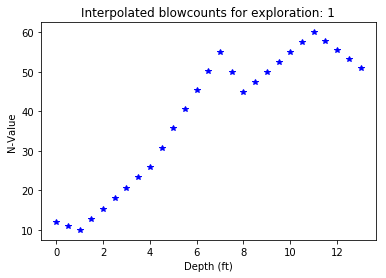

In [106]:
def graph_blowcounts(blowcounts,exploration_number):
    temp_list = []
    for u in blowcounts:
        if u[2] == exploration_number:
            temp_list.append(u)
    i,j = unpack_two_tuple(temp_list)
    plt.plot(i,j,'*b')
    plt.title("Interpolated blowcounts for exploration: "+str(exploration_number))
    plt.xlabel("Depth (ft)")
    plt.ylabel("N-Value")
    return plt.show()

graph_blowcounts(blowcounts,1)

In [99]:
#Read input layers csv
df2 = pd.read_csv(lyr_path, index_col=['OBJECT_ID'])

In [100]:
#Read csv and convert saturated unit density table to dictionary
#Convert to float
den_df = pd.read_csv('Sat_UnitDensity.csv', index_col='UID')
#Returns 'Density'
den_df_key = den_df.keys()[0]

def build_density_dict(df, key):
    key_names = df.keys() 
    df = df.to_dict()
    df = df[key]
    for value in df.keys():
        df[value] = float(df[value])
    return df

den_dict = build_density_dict(den_df, den_df_key)
print(den_dict)

{'Qal': 1880.0, 'Qf': 1880.0, 'Ql': 1880.0, 'Qls': 1900.0, 'Qmw': 1900.0, 'Qp': 1880.0, 'Qw': 1880.0, 'Qob': 1880.0, 'Qpf': 2000.0, 'Qpff': 2000.0, 'Qpfn': 2000.0, 'Qpfnc': 2000.0, 'Qpfnf': 2000.0, 'Qpoc': 2000.0, 'Qpog': 2000.0, 'Qpogt': 2000.0, 'Qpon': 2000.0, 'Qponc': 2000.0, 'Qgpc': 1880.0, 'Qcg': 1880.0, 'Qva': 1920.0, 'Qvi': 1880.0, 'Qvlc': 2000.0, 'Qvr': 1880.0, 'Qvrl': 1880.0, 'Qvrlb': 1880.0, 'Qvrlbt': 1880.0, 'Qvrlf': 1880.0, 'Qvrlj': 1880.0, 'Qvel': 1880.0, 'Qvrlr': 1880.0, 'Qvrlt': 1880.0, 'Qvt': 1880.0, 'Qga': 1920.0, 'Qga(t)': 1920.0, 'Qgt': 1880.0, 'Qgo': 1880.0, 'Qgu': 1880.0}


In [101]:
"""Uses density dictionary to match unit IDs (UID) to a density value and fills in the df column"""

def fill_density(df, density_dict):
    density_list = df['UID'].tolist()
    den_col = [density_dict[x] for x in density_list]
    df = df.assign(DENSITY=den_col)
    return df

layers = fill_density(df2, den_dict)
print(layers)

           EXPLOR_ID  UPPER_D  LOWER_D USCS_CLASS   UID  DENSITY
OBJECT_ID                                                       
1                  1        0        1         SP   Qva   1920.0
4                  1        1        4      SP-SM   Qva   1920.0
7                  1        4        7         ML  Qvlc   2000.0
8                  1        7        8      ML-CL  Qvlc   2000.0
11                 1        8       11      CL-CH  Qvlc   2000.0
12                 1       11       13         CH  Qvlc   2000.0
19                 1       13       19         SP  Qpfn   2000.0
21                 2        0        2      SP-SW   Qal   1880.0
24                 2        2        5         SP   Qal   1880.0
27                 2        5        8      CL-CH   Qls   1900.0


In [102]:
"""Interpolates data in rows to every 0.5 foot and builds new table"""

def interpolate_lyrs(df):
    #column names
    b_col = 'UPPER_D'
    l_col = 'LOWER_D'
    e_col = 'EXPLOR_ID'
    c_col = 'USCS_CLASS'
    u_col = 'UID'
    d_col = 'DENSITY'
    upper = df[b_col].tolist()
    lower = df[l_col].tolist()
    uls = []
    for u,l in list(zip(upper, lower)):
        uls.append(np.arange(u,l,0.5))
    expl = df[e_col].tolist()
    uscs = df[c_col].tolist()
    uid = df[u_col].tolist()
    dens = df[d_col].tolist()
    expl_info = []
    class_info = []
    unit_info = []
    dens_info = []
    depths = []
    for x,e,c,u,d in list(zip(uls, expl, uscs, uid, dens)):
        length = len(x)
        counter = 0
        while counter < length:
            expl_info.append(e)
            class_info.append(c)
            unit_info.append(u)
            dens_info.append(d)
            counter += 1
        counter = 0
    for x in uls:
        for g in x:
            depths.append(g)
    result = pd.DataFrame(
        {e_col:expl_info, 
         'DEPTH':depths, 
         c_col:class_info, 
         u_col:unit_info, 
         d_col:dens_info})
    return result
    

In [103]:
layer_df = interpolate_lyrs(layers)
layer_df

,DENSITY,DEPTH,EXPLOR_ID,UID,USCS_CLASS
0,1920.0,0.0,1,Qva,SP
1,1920.0,0.5,1,Qva,SP
2,1920.0,1.0,1,Qva,SP-SM
3,1920.0,1.5,1,Qva,SP-SM
4,1920.0,2.0,1,Qva,SP-SM
5,1920.0,2.5,1,Qva,SP-SM
6,1920.0,3.0,1,Qva,SP-SM
7,1920.0,3.5,1,Qva,SP-SM
8,2000.0,4.0,1,Qvlc,ML
9,2000.0,4.5,1,Qvlc,ML


In [45]:
"""Hodgepodge of code"""


"""Ways to slice"""
#Alternate way of slicing, still have not flushed out
ffg = df2[df2.EXPLOR_ID == 1]
ffg = slice_dice(ffg)
df2_slice = slice_dice(df2)
lyr_iterdata = five_tuple(df2_slice)
lyr_data = group_tuples(lyr_iterdata,0)


"""Build list of necessary tuples, convert values to floats 
from two df columns for interpolation"""
def five_tuple(somelist):
    #Index
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[1]))
    #X1
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[2]))
    #X2
    list_3 = []
    for itup in somelist:
        list_3.append(float(itup[3]))
    #Y1
    list_4 = []
    for itup in somelist:
        list_4.append(itup[4])
    #Y2
    list_5 = []
    for itup in somelist:
        list_5.append(itup[5])
    tuplist = list(zip(list_1, list_2, list_3, list_4, list_5))
    return tuplist


In [54]:
#Build dictionary, unique values to interpolate?
uscs_values = {
    ('CH'): -14,
    ('CH-CL','CL-CH'):-13,
    ('CL'): -12,
    ('CH-OH','OH-CH'):-11,
    ('OH'): -10,
    ('MH-OH','OH-MH'):-9,
    ('MH'): -8,
    ('ML-MH', 'MH-ML'):-7,
    ('OH-OL','OL-OH'):-6,
    ('CL-OL','OL-CL'):-5,
    ('ML-CL', 'CL-ML'):-4,
    ('OL'): -3,
    ('ML-OL','OL-ML'):-2,
    ('ML'): -1,
    ('U'):0,
    ('SC'):1,
    ('SM-SC','SC-SM'):2,
    ('SW-SC','SP-SC'):3,
    ('SM'):4,
    ('SW-SM','SP-SM'):5,
    ('SW'): 6,
    ('SP-SW', 'SW-SP'):7,
    ('SP'): 8,
    ('GC'):9,
    ('GM-GC','GC-GM'):10,
    ('GW-GC','GP-GC'):11,
    ('GM'):12,
    ('GW-GM','GP-GM'):13,
    ('GW'): 14,
    ('GP-GW', 'GW-GP'):15,
    ('GP'): 16,   
}

In [53]:
fines_content = {
('SW','SP','GW','GP'):0.045,
('SW-SM','SW-SC','SP-SM','SP-SC'):0.115,
('SW-GM','SW-GC','SP-GM','SP-GC'):0.115,
('GW-SM','GW-SC','GP-SM','GP-SC'):0.115,
('GW-GM','GW-GC','GP-GM','GP-GC'):0.115,
('SM-SC','SC-SM'):0.25,
('GM-GC','GC-GM'):0.25,
('SM','GM'):0.3,
('SC','GC'):0.2}